In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preguntas que buscamos responder con este conjunto

¿Quiénes tienen peor calidad del sueño, hombres o mujeres?

¿Existe una relación entre la calidad del sueño de las personas y su profesión?

¿La actividad física afecta al sueño?

¿Qué profesión presenta la peor calidad de sueño?

¿Cuál profesión tienen a las personas con el mayor nivel de estrés y el mayor índice de masa corporal?

¿En qué rango de edades se encuentran la mayor cantidad de trastornos del sueño?

La cantidad de pasos al día, ¿afecta la calidad del sueño? ¿al índice de masa corporal?

In [4]:
data = pd.read_csv('C:/Users/camil/Documents/DataAnalytics/CSVs/Sleep_health_and_lifestyle_dataset.csv',
                  index_col = 'Person ID')
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


In [6]:
data.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## Analisis de edades

In [8]:
data['Gender'].value_counts()

Male      189
Female    185
Name: Gender, dtype: int64

In [9]:
data.Gender.value_counts()

Male      189
Female    185
Name: Gender, dtype: int64

In [10]:
data['Age'].mean()

42.18449197860963

In [17]:
data['Age'].std()

8.67313346554724

In [18]:
data.loc[data['Age'] <= 40, 'Age_group'] = 'Adult'
data.loc[data['Age'] >= 41, 'Age_group'] = 'Older Adult'

In [19]:
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age_group
Person ID,,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,Adult
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,Adult
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,Adult
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Adult
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Adult


In [20]:
data.tail()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age_group
Person ID,,,,,,,,,,,,,
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Older Adult
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Older Adult
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Older Adult
373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Older Adult
374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Older Adult


In [21]:
data['Age_group'].value_counts()

Older Adult    209
Adult          165
Name: Age_group, dtype: int64

In [23]:
data_gender = data.groupby('Gender')['Age'].agg(['mean','std'])
data_gender

,mean,std
Gender,,
Female,47.405405,8.093407
Male,37.074074,5.662006


## Analisis de las ocupaciones

In [24]:
data.groupby('Occupation')['Gender'].value_counts()

Occupation            Gender
Accountant            Female    36
                      Male       1
Doctor                Male      69
                      Female     2
Engineer              Female    32
                      Male      31
Lawyer                Male      45
                      Female     2
Manager               Female     1
Nurse                 Female    73
Sales Representative  Male       2
Salesperson           Male      32
Scientist             Female     4
Software Engineer     Male       4
Teacher               Female    35
                      Male       5
Name: Gender, dtype: int64

In [25]:
print(data['Sleep Duration'].min(), data['Sleep Duration'].max())

5.8 8.5


In [26]:
# Calidad y duracion del sueño dependiendo el sexo.

data.groupby('Gender')[['Sleep Duration','Quality of Sleep']].mean()

,Sleep Duration,Quality of Sleep
Gender,,
Female,7.229730,7.664865
Male,7.036508,6.968254


In [28]:
# Calidad y duracion del sueño en las distintas ocupaciones
occ_quality = data.groupby('Occupation')[['Sleep Duration', 'Quality of Sleep']].mean()
occ_quality.sort_values(by='Quality of Sleep')

,Sleep Duration,Quality of Sleep
Occupation,,
Sales Representative,5.900000,4.000000
Scientist,6.000000,5.000000
Salesperson,6.403125,6.000000
Software Engineer,6.750000,6.500000
Doctor,6.970423,6.647887
Teacher,6.690000,6.975000
Manager,6.900000,7.000000
Nurse,7.063014,7.369863
Accountant,7.113514,7.891892


In [33]:
# El indice de masa corporal por ocupaciones
occ_bmi = data.groupby('Occupation')['BMI Category'].value_counts()
occ_bmi.sort_values()

Occupation            BMI Category 
Lawyer                Normal Weight     1
Software Engineer     Overweight        1
                      Obese             1
Manager               Overweight        1
Teacher               Obese             1
Doctor                Normal Weight     2
Lawyer                Obese             2
                      Overweight        2
Software Engineer     Normal Weight     2
Sales Representative  Obese             2
Engineer              Overweight        3
                      Normal Weight     4
Doctor                Obese             4
Scientist             Overweight        4
Accountant            Normal Weight     5
                      Overweight        6
Teacher               Normal            6
Nurse                 Normal Weight     7
Accountant            Normal           26
Salesperson           Overweight       32
Teacher               Overweight       33
Lawyer                Normal           42
Engineer              Normal           5

In [36]:
occ_steps =  data.groupby('Occupation')[['Daily Steps','Physical Activity Level',
                           'Sleep Duration', 'Quality of Sleep']].mean()
occ_steps.sort_values(by='Quality of Sleep')

,Daily Steps,Physical Activity Level,Sleep Duration,Quality of Sleep
Occupation,,,,
Sales Representative,3000.000000,30.000000,5.900000,4.000000
Scientist,5350.000000,41.000000,6.000000,5.000000
Salesperson,6000.000000,45.000000,6.403125,6.000000
Software Engineer,5800.000000,48.000000,6.750000,6.500000
Doctor,6808.450704,55.352113,6.970423,6.647887
Teacher,5957.500000,45.625000,6.690000,6.975000
Manager,5500.000000,55.000000,6.900000,7.000000
Nurse,8057.534247,78.589041,7.063014,7.369863
Accountant,6881.081081,58.108108,7.113514,7.891892


In [38]:
occ_steps =  data.groupby('Occupation')[['Daily Steps','Physical Activity Level',
                           'Sleep Duration', 'Quality of Sleep','Stress Level']].mean()
occ_steps.sort_values(by='Quality of Sleep')

,Daily Steps,Physical Activity Level,Sleep Duration,Quality of Sleep,Stress Level
Occupation,,,,,
Sales Representative,3000.000000,30.000000,5.900000,4.000000,8.000000
Scientist,5350.000000,41.000000,6.000000,5.000000,7.000000
Salesperson,6000.000000,45.000000,6.403125,6.000000,7.000000
Software Engineer,5800.000000,48.000000,6.750000,6.500000,6.000000
Doctor,6808.450704,55.352113,6.970423,6.647887,6.732394
Teacher,5957.500000,45.625000,6.690000,6.975000,4.525000
Manager,5500.000000,55.000000,6.900000,7.000000,5.000000
Nurse,8057.534247,78.589041,7.063014,7.369863,5.547945
Accountant,6881.081081,58.108108,7.113514,7.891892,4.594595


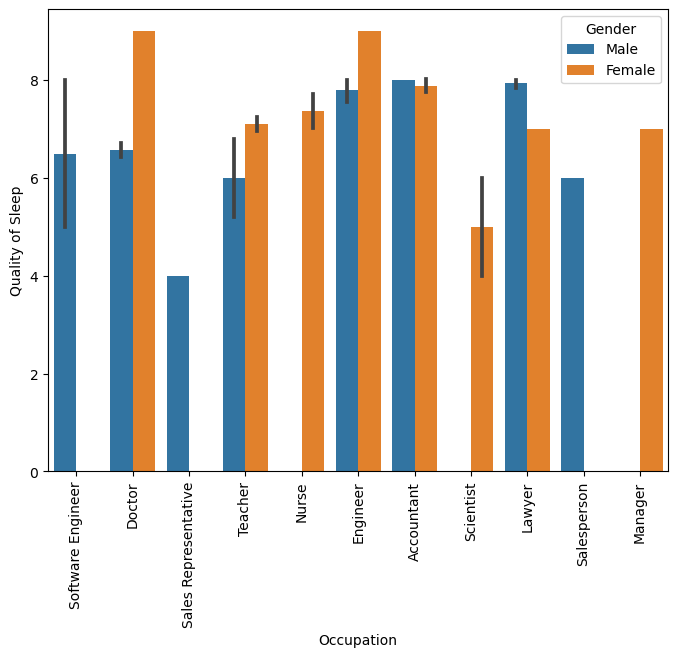

In [56]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=data,x = 'Occupation', y= 'Quality of Sleep', hue='Gender')
plt.xticks(rotation=90)
plt.show()

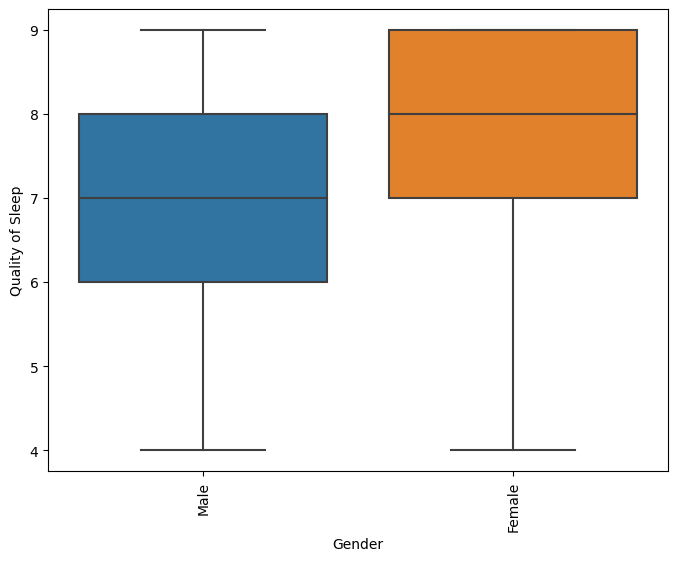

In [62]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=data,x = 'Gender', y= 'Quality of Sleep')
plt.xticks(rotation=90)
plt.show()

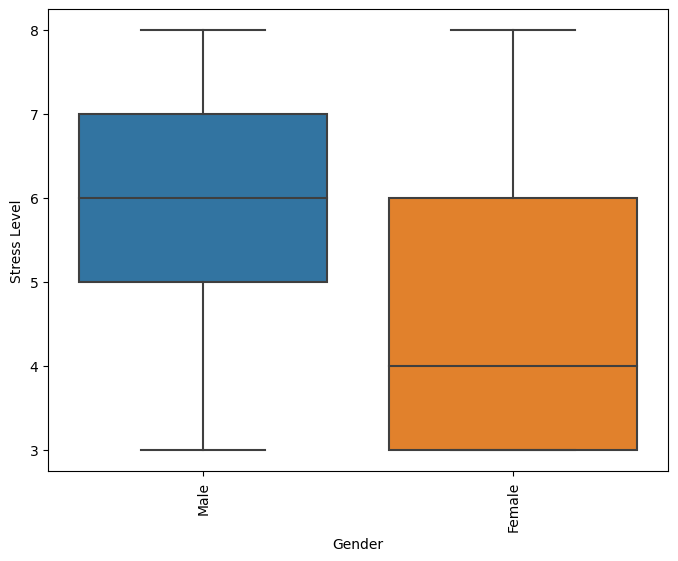

In [63]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=data,x = 'Gender', y= 'Stress Level')
plt.xticks(rotation=90)
plt.show()

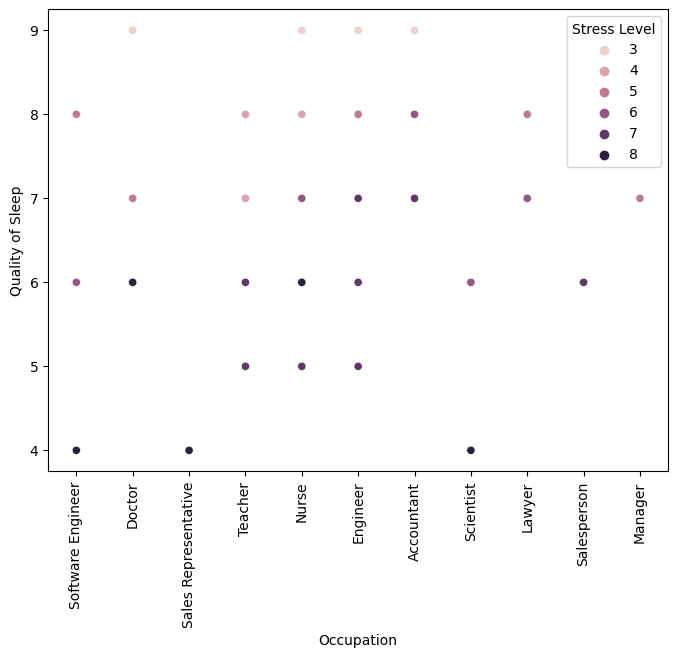

In [65]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=data,x = 'Occupation', y= 'Quality of Sleep', hue='Stress Level')
plt.xticks(rotation=90)
plt.show()